## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [105]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [106]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [107]:
df.shape[0]
print("Number of rows in the dataset is :{}".format(df.shape[0]))

Number of rows in the dataset is :294478


c. The number of unique users in the dataset.

In [108]:
df_u=df.user_id.nunique()
print("Number of unique users in the dataset is :{}".format(df_u))

Number of unique users in the dataset is :290584


In [109]:
#to find the number of unique users in control group:
control_df=df.query('group=="control"')
uuc_old=control_df.query('landing_page=="old_page"').user_id.nunique()
uuc_new=control_df.query('landing_page=="new_page"').user_id.nunique()
print("Number of unique users in the control group landed in old page is :{}".format(uuc_old))
print("Number of unique users in the control group landed in new page is :{}".format(uuc_new))

Number of unique users in the control group landed in old page is :145274
Number of unique users in the control group landed in new page is :1928


In [110]:
treatment_df=df.query('group=="treatment"')
uut_old=treatment_df.query('landing_page=="old_page"').user_id.nunique()
uut_new=treatment_df.query('landing_page=="new_page"').user_id.nunique()


print("Number of unique users in the treatment group landed in old page is :{}".format(uut_old))
print("Number of unique users in the treatment group landed in new page is :{}".format(uut_new))

Number of unique users in the treatment group landed in old page is :1965
Number of unique users in the treatment group landed in new page is :145310


d. The proportion of users converted.

In [111]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [112]:
# uuc_new is the Number of unique users in the control group landed in new page
# uut_old is the Number of unique users in the treatment group landed in old page
df_ct=uuc_new + uut_old
print("Number of times new_page and treatment don't line up : {}".format(df_ct))

Number of times new_page and treatment don't line up : 3893


f. Do any of the rows have missing values?

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No rows have missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

We are removing 3893 rows(where treatment is not aligned with new_page and control is not aligned with old page).

In [114]:
#dropping rows
df.drop(df.query("group== 'control' and landing_page=='new_page'").index,inplace=True)
df.drop(df.query("group== 'treatment' and landing_page=='old_page'").index,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [115]:
df.to_csv('edited_ab_data.csv',index=False)

In [116]:
df2=pd.read_csv('edited_ab_data.csv')

In [117]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

2.a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [118]:
df2.shape[0]
print("Number of rows in df2 : {}".format(df2.shape[0]))

Number of rows in df2 : 290585


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [119]:
df_u2=df2.user_id.nunique()
print("Number of unique user_ids in df2 : {}".format(df_u2))

Number of unique user_ids in df2 : 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [120]:
#Finding the duplicated row in df2
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

1899 and 2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [121]:
#removing the duplicated row
df2=df2.drop_duplicates(['user_id'])
df2.shape[0]


290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [122]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [123]:
control_df2=df2.query('group=="control"')
P_c=control_df2['converted'].mean()
print("Given that an individual was in the control group,the probability they converted is {}".format(P_c))

Given that an individual was in the control group,the probability they converted is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [124]:
treatment_df2=df2.query('group=="treatment"')
P_t=treatment_df2['converted'].mean()
print("Given that an individual was in the treatment group,the probability they converted is {}".format(P_t))

Given that an individual was in the treatment group,the probability they converted is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [125]:
#probability of individual receiving new page= number of users in treatment group/total num,ber of users
len(treatment_df2)

145310

In [126]:
(df2.shape[0])

290584

In [127]:
P_n=(len(treatment_df2)) / (df2.shape[0])
print("Probability that an individual received the new page is {}".format(P_n))

Probability that an individual received the new page is 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

Given that an individual was in the control group,the probability they converted is 0.1203863045004612.
Given that an individual was in the treatment group,the probability they converted is 0.11880806551510564.
Just by looking at these probabilities,by slight margin old page leads to more conversions.
Since we don't have more information it is hard to conclude.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


Hypothesis :

$H_{0}$ : $p_{new}$ <= $p_{old}$ 

$H_{1}$ : $p_{new}$ > $p_{old}$ 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [128]:
P_new=df2['converted'].mean()
print("convert rate for P_new under the null is {}" .format(P_new))

convert rate for P_new under the null is 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [129]:
#we assumed Pnew and Pold are equal
P_old=df2['converted'].mean()
print("convert rate for P_old under the null is {}" .format(P_old))

convert rate for P_old under the null is 0.11959708724499628


c. What is $n_{new}$?

In [130]:
n_new=len(df2.query('group=="treatment"'))
print("n_new :{}".format(n_new))

n_new :145310


d. What is $n_{old}$?

In [131]:
n_old=len(df2.query('group=="control"'))
print("n_old : {}".format(n_old))

n_old : 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [132]:
new_page_converted=np.random.choice([1,0],p=(P_new,1-P_new),size=n_new)
len(new_page_converted)

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [133]:
old_page_converted=np.random.choice([1,0],p=(P_old,1-P_old),size=n_old)
len(old_page_converted)

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [134]:
#since new_page converted has 36 values more than old_page_converted we truncate new_page_converted.
new_page_converted=new_page_converted[:145274]
len(new_page_converted)

145274

In [135]:
P_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
P_diff

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         0.00000000e+00,   6.88183883e-06,   0.00000000e+00])

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [136]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0],p=(P_new,1-P_new),size=n_new).mean()
    old_page_converted = np.random.choice([1, 0],p=(P_old,1-P_old),size=n_old).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

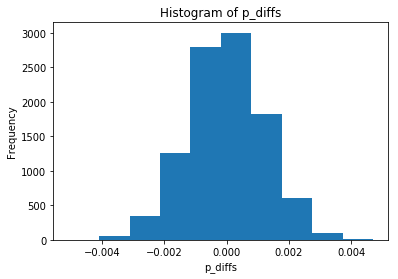

In [137]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Histogram of p_diffs');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [138]:
Actual_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
Actual_diff

-0.0015790565976871451

In [140]:
P_diffs = np.array(p_diffs)
P_diffs


array([  2.70962411e-03,   6.10090261e-04,  -9.83520189e-05, ...,
         5.62207302e-04,  -5.18232867e-04,   8.72074230e-04])

In [141]:
# proportion of P_diffs greater than the actual difference observed in ab_data.csv is computed as:
(Actual_diff < P_diffs).mean()

0.90280000000000005

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j,we computed the P-value.
The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true.
A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis.

Here we conclude that our null hypothesis is true as the old and new pages performed in a similar way.Slightly more is done by the old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [142]:
import statsmodels.api as sm

convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]

n_old = (df2.query("group == 'control'")).shape[0]
n_new = (df2.query("group == 'treatment'")).shape[0]
convert_old,convert_new,n_old,n_new 

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [143]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [144]:
from scipy.stats import norm

#Tells us how significant our z-score is
print(norm.cdf(z_score))


#Tells us what our critical value at 95% confidence 
print(norm.ppf(1-(0.05)))




0.905058312759
1.64485362695


Since the z-score of 1.3109241984234394 is less than the critical value of 1.64485362695, we accept the null hypothesis.
Conversion rates of old pages are slightly better than the new pages.
These values agree with the findings in part j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [145]:
#creating dummy variables for group
df['intercept']=1
df[['treatment','control']]=pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [146]:
logit_mod=sm.Logit(df['converted'],df[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [147]:
results=logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Mar 2018   Pseudo R-squ.:               8.085e-06
Time:                        00:36:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.147      0.000      -2.020      -1.988
treatment      0.0150      0.011      1.312      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Here P-valueis 0.190.

Hypothesis section III :

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0

$H_{1}$ : $p_{new}$ - $p_{old}$ != 0

Hypothesis section II:

$H_{0}$ : $p_{new}$ <= $p_{old}$ = 0


$H_{1}$ : $p_{new}$ > $p_{old}$ != 0

In the Hypothesis of section II since  alternative hypothesis has '>' sign,simulation and the z-test were implemented as a one-tailed test.
Whereas in the section III since the alternative hypothesis has '!=' sign, logistic regression was implemented as a two-tailed test. 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Yes.It is a good idea to consider other factors to add into your regression model.Here an individual converts into new page might depend on factors like gender,age,accademic background,Time of year,country etc.

Yes.There is disadvantage to adding additional terms into regression model. 
Our hypothesis testing results may not be reliable. It turns out that having correlated explanatory variables means that our coefficient estimates are less stable.Multicollinearity exists when two or more of the predictors in a regression model are moderately or highly correlated. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [148]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [149]:
df_new=df2.merge(countries_df,on='user_id',how='left')
df_new.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US


In [150]:
countries_df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [151]:
#Create the necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])
df_new=df_new.drop('UK',axis=1)


In [152]:
df_new[['old_page','new_page']]=pd.get_dummies(df_new['landing_page'])
df_new=df_new.drop('old_page',axis=1)

In [153]:
import statsmodels.api as sm

df_new['intercept'] = 1

#Create Logit regression model for conveted and country, and us CA and old page as baseline
logit3 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','US','CA']])
results3= logit3.fit()
results3.summary()



Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 10 Mar 2018   Pseudo R-squ.:               2.323e-05
Time:                        00:36:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
new_page       0.0149      0.011      1.307      0.191      -0.007       0.037
US             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [154]:
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)


(1.0151130646157189, 1.0519020483004984, 1.0416437559600236)

When new page decrease by one unit , the chance of conversion happening will increase by 1.5%.
When US increase by 1 unit,the chance of conversion happening will increase by 5.19%.
When CA increase by 1 unit,the chance of conversion happening will increase by 4.16%


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [155]:
#Create a new intereacton variable between new page and country US and CA
df_new['CA_new_page'] = df_new['new_page']* df_new['CA']
df_new['US_new_page'] = df_new['new_page']* df_new['US']


In [156]:
#Create logistic regression for the intereaction variable between new page and country using dummy variable
logit4 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','CA_new_page','US_new_page','CA','US']])
results4 = logit4.fit()
results4.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Mar 2018   Pseudo R-squ.:               3.482e-05
Time:                        00:37:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0715      0.037    -55.798      0.000      -2.144      -1.999
new_page        0.0674      0.052      1.297      0.195      -0.034       0.169
CA_new_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
US_new_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
CA              0.0644      0.038      1.679      0.093      -0.011       0.140
US              0.0901      0.040      2.225      0.026       0.011       0.169
===============================================================================
"""

In [157]:
np.exp(results4.params)


intercept      0.126002
new_page       1.069775
CA_new_page    0.954198
US_new_page    0.924703
CA             1.066532
US             1.094247
dtype: float64

From the results we see that p<0.05 belong to only the intercept, which is statistically independent and is the only deciding factor of conversion rate here.Since no other variable present in the summary has a role ,we can conclude that a user ending in a landing page is not dependant on the country he lives.

In this logistic regression model also the values of conversion rates vary slightly.So we accept the null hypothesis sticking with the old page.

<a id='conclusions'></a>
## Conclusions

We performed different techniques based on the available data.And all the techniques shows the same result.Thereby we accept the null hypothesis and reject the alternate.We conclude to maintain the old page as is without any change.
Limitation:
Several factors are missing in the data.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.